# GIK2FB Artificial Intelligence HT22

## Lab 4: ML - Supervised Regression Learning, Naive Bayes (Probabilistic Classifier)

Dalarna University
(c) Joonas Pääkkönen, fall 2022

### Deadline: Monday Dec 19th, 2022, 23:59 CET time

Upload your .ipynb file to Learn. No video, just the .ipynb file. Simply write your code in the .ipynb file and submit it. Do not zip anything, like the datasets, with it.

Use Scikit-learn first and foremost, with the help of Pandas, NumPy, SciPy, Matplotlib and Seaborn, if needed. Remember that Pandas dataframes come in very handy in data science.

Note: plotting pairplots may take several seconds or even minutes.

Make sure that your code runs before submitting.

Remember to fill in the information below, i.e., student name(s) and email address(es).

### Student name(s): model solutions

### DU email address(es): model solutions

Good luck!

### Task 1: Linear regression

Task 1.1: Import Pandas, and download the hungary_chickenpox.csv dataset from
https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases and save the data into a variable called "chickendata" with the read.csv() method of the Pandas module.

In [1]:
import pandas as pd

chickendata = pd.read_csv("chickendata.csv")


Task 1.2: Print the chickendata dataset by simply writing the variable name.

In [2]:
chickendata

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,56,7,13,122,4,23,4,11,110,10
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,34,20,18,70,36,5,23,22,63,9
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,30,36,4,72,5,21,14,0,17,10
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,27,17,21,12,5,17,1,1,83,2


Task 1.3: Use the Pandas describe() method to describe chickendata.

In [3]:
chickendata.describe()

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,101.245211,34.204981,37.166667,28.911877,57.082375,31.488506,33.272031,41.436782,47.097701,29.691571,40.869732,25.643678,21.850575,86.101533,27.609195,29.854406,20.352490,22.467433,40.636015,19.873563
std,76.354872,32.567222,36.843095,37.618092,50.725437,33.790208,31.397989,36.014297,44.610836,31.857750,37.283299,24.467995,22.025999,66.773741,26.724236,31.814630,23.273025,25.006638,40.699471,21.999636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.250000,8.000000,8.000000,4.000000,14.250000,6.000000,7.000000,9.000000,11.000000,6.250000,10.000000,6.000000,4.000000,28.250000,6.000000,6.000000,4.000000,3.000000,7.250000,4.000000
50%,93.000000,25.000000,29.500000,14.000000,46.500000,20.500000,24.000000,35.000000,37.000000,21.000000,31.000000,19.000000,15.000000,81.000000,20.500000,18.500000,12.000000,13.000000,32.000000,13.000000
75%,149.000000,51.000000,53.000000,38.750000,83.750000,47.000000,51.750000,63.000000,68.000000,41.000000,61.750000,39.000000,32.750000,129.750000,41.000000,45.000000,29.000000,34.000000,59.000000,31.000000
max,479.000000,194.000000,274.000000,271.000000,355.000000,199.000000,164.000000,181.000000,262.000000,210.000000,224.000000,160.000000,112.000000,431.000000,155.000000,203.000000,131.000000,141.000000,230.000000,216.000000


Task 1.4: Use Seaborn to plot the pairplot of the dataset.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.pairplot(chickendata)
#plt.show

Task 1.5: Use the scatterplot() method of Seaborn to plot a scatterplot where the x-coordinates are from the BUDAPEST column and the y-coordinates are from the VAS column.

<AxesSubplot:xlabel='BUDAPEST', ylabel='VAS'>

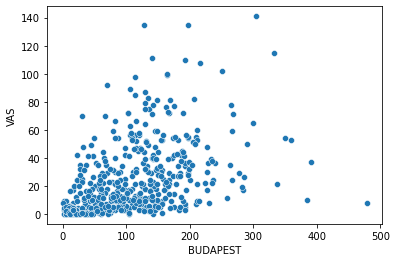

In [5]:
sns.scatterplot(data = chickendata,  x="BUDAPEST", y= "VAS")

Task 1.6: Use Scikit-learn to fit a simple linear OLS regression line to the data visualized in Task 1.5. Plot the linear regression line alongside the scatterplot of Task 1.5. Make sure the line and the scatterplot points are in different colors. Note: you may need to reshape the data first.

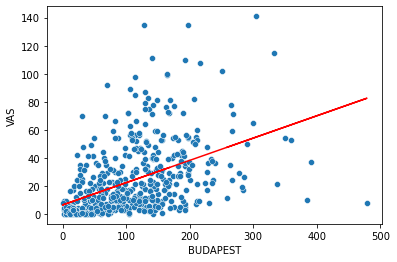

The "R^2" aka the coefficient
of determination of the model is: 0.2356501580146917


In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
# Taking only the selected two attributes from the dataset

X = np.array(chickendata['BUDAPEST']).reshape(-1, 1)
y = np.array(chickendata['VAS']).reshape(-1, 1)


reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

#ska man göra reshape på scatter också? använder denna då
#plt.scatter(X_test, y_test, color ='b')
reg.fit(X, y)

plt.plot(X, y_pred, color ='red')
#sns.regplot(x="BUDAPEST", y="VAS", data=chickendata)

sns.scatterplot(data = chickendata,  x="BUDAPEST", y= "VAS")

reg_score = reg.score(X, y)
  
plt.show()
print (f"""The "R^2" aka the coefficient
of determination of the model is: {reg_score}""")

Task 1.7: What is the value of the coefficient of determination for the linear regression model of Task 1.6?

In [7]:
print (f"""The "R^2" aka the coefficient
of determination of the model is: {reg_score}""")


The "R^2" aka the coefficient
of determination of the model is: 0.2356501580146917


Task 1.8: Use Scikit-learn to fit an ordinary least squares linear regression model to predict the values of the BUDAPEST column with all the other data columns of the chickendata dataset, not only with the VAS column. Find the $R^2$-value for the prediction. Similarly, fit a Ridge regression model and also a LASSO regression model to the same data. Find the corresponding $R^2$-values for these two models as you did for the simple linear regression model. That is, you need to print all the three coefficients of determination to pass this task.

In [8]:


    from sklearn.linear_model import Ridge
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.linear_model import Lasso

    X = chickendata.drop(['BUDAPEST', 'Date'], axis = 1)
    y = chickendata['BUDAPEST']
    

    #OLS regression model
    lr = LinearRegression()
    lr.fit(X, y)
    pred_test_lr= lr.predict(X)
    print(f""" 
    The R2 score of the OLS regression model is: 
    {r2_score(y, pred_test_lr)}
    """)


    #Ridge regression model
    rr = Ridge(alpha=0.01)
    rr.fit(X, y) 
    pred_test_rr= rr.predict(X)
    print(f"""
    The R2 score of the ridge regression model is: 
    {r2_score(y, pred_test_rr)}
    """)

    

    #Lasso regression model
    model_lasso = Lasso(alpha=0.01)
    model_lasso.fit(X, y) 
    pred_test_lasso= model_lasso.predict(X)
    print(f"""
    The R2 score from Lasso regression model is: 
    {r2_score(y, pred_test_lasso)}
    """)


 
The R2 score of the OLS regression model is: 
0.7203360896133674


The R2 score of the ridge regression model is: 
0.7203360896133671


The R2 score from Lasso regression model is: 
0.7203360884455705



Task 1.9: Now you have three different models and three different $R^2$-values. In terms of the $R^2$-value, which model performs the best? How would you comment these results in your own words? Enter your answer here:

In [9]:
#On this dataset none of the models performed way better than the other models. 
#OlS however performed sligthly better but the difference is so small it's not resonable to say 
#it was better than the others.  

### Task 2: Binary classification with logistic regression and Gaussian Naive Bayes

Task 2.1: Download the DryBeanDataset.zip file from
https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset and save Dry_Bean_Dataset.xlsx to variable "beandata". You need to read an .xlsx file now.

In [10]:
import pandas as pd
beandata = pd.read_excel('Dry_Bean_Dataset.xlsx')



Task 2.2: Print the beandata dataset by simply writing the variable name.

In [11]:
beandata

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


Task 2.3: Use the describe() method to describe the dataset.

In [12]:
beandata.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Task 2.4: What is the range (the difference between the maximum and the minimum) of the Area feature?

In [13]:
diff = beandata['Area'].agg(['min', 'max'])
print(diff[1] - diff[0])

234196


Task 2.5: Use Seaborn to plot the pairplots of the dataset with the hue argument set to the class of the bean. Note that there are several kinds of beans. Follow the link in Task 2.1 if you want to read more details about the data.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.pairplot(beandata, hue = "Class")
#plt.show

Task 2.6: Imagine that you were to use a regression model to predict the Eccentricity feature as the regression target variable with the AspectRation feature as the independent variable. By looking at the corresponding pairplot above, what type of a regression model would you choose? Motivate your answer in your own words.

Bonus: If you want, you can also apply the regression model of your choice here and plot the results, but this is not compulsory. Nonetheless, executing this bonus task can compensate for some shortcomings in the other tasks.

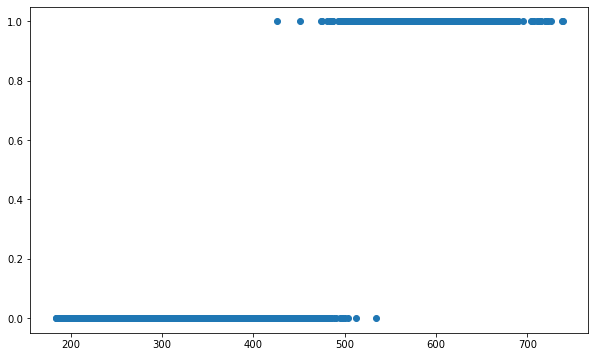

AttributeError: 'PolynomialFeatures' object has no attribute 'fit_transfrom'

In [15]:


#I would choose to use polynomial regression because it can curve which would
#explain the above data more accuratly
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X = beandata['MajorAxisLength'].values
X = X.reshape(-1,1)

dummy_value = pd.get_dummies(beandata['Class'].values)
y = dummy_value['BOMBAY'].values
    
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.show()


poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transfrom(X.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)
# depicting the polynomial graph
plt.figure(figsize=(10, 6))
plt.title("Polynomial Regression", size=16)
plt.scatter(x,y)
plt.plot(x, y_predicted, c='red')
plt.show()

Task 2.7: Let's say we are only interested in Bombay beans. Use Scikit-learn to build a logistic regression predictor based on the major axis length of the beans to separate Bombay beans from other beans. Plot the regression curve in the same figure with the corresponding scatterplot.

In [ ]:
from sklearn.linear_model import LogisticRegression


X = beandata['MajorAxisLength'].values
X = X.reshape(-1,1)

dummy_value = pd.get_dummies(beandata['Class'].values)
y = dummy_value['BOMBAY'].values


clf = LogisticRegression(max_iter=1000).fit(X, y)
pred_test_clf = clf.predict(X)

sns.regplot(x=X, y=y, data=beandata, logistic=True, ci=None, color='black')

plt.scatter(X,pred_test_clf,color='red')
plt.show()


clf.score(X, y)

Task 2.8: Use the score() method to evaluate the accuracy of the model.

In [ ]:
clf.score(X,y)

Task 2.9: How would you describe the accuracy value? Write your answer in your own words here:

In [ ]:
#The answer tells us how many of the y values were calssified as the correct class

Task 2.10: Let's say we are still only interested in the Bombay beans of Task 2. Use Scikit-learn to build a Gaussian Naive Bayes (GaussianNB) predictor based on the major axis length of the beans to separate Bombay beans from other beans. Plot the regression curve in the same figure with the corresponding scatterplot. That is, repeat Task 2.7 but this time with the GaussianNB classifier.

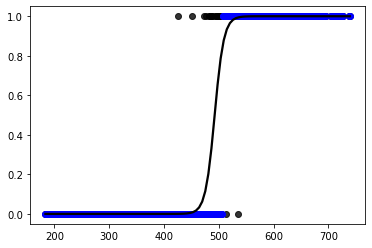

0.9982367202997575


In [16]:
from sklearn.naive_bayes import GaussianNB

X = np.array(beandata['MajorAxisLength']).reshape(-1,1)
dummy_value = pd.get_dummies(beandata['Class'].values)
y = dummy_value['BOMBAY'].values

nb = GaussianNB()
nb.fit(X, y)
pred_test_nb = nb.predict(X)

sns.regplot(x=X, y=y, data=beandata, logistic=True, ci=None, color='black')

plt.scatter(X,pred_test_nb,color='blue')
plt.show()

print(nb.score(X, y))

Task 2.11: Use the score() method to evaluate the accuracy of the GaussianNB model.

In [17]:
print(nb.score(X, y))

0.9982367202997575


Task 2.12: How many beans did the classifier misclassify?

In [18]:
value = len(beandata)
div = float(nb.score(X, y))

amount = value*(1-div)
print(f""" 
The classifier misclassified:
{int(amount)} beans""")




 
The classifier misclassified:
24 beans


Task 2.13: How would you comment the results in your own words? Compare the logistic regression model and the Gaussian Naive Bayes model performance. Write your answer in your own words here:

In [ ]:
#The result is very similar when using the different models so I would not prefer one over the other 
#on this data. However Bayes is more often used to classify data which is what we are doing. 
#A reson to use logistic regression is because it has a lower risk of depending too much on 
#repetative features